<h1 align="center">Mathematical Methods In Engineering - 25872</h1>
<h2 align="center">Dr. Amiri</h2>
<h4 align="center">Sharif University of Technology, Spring 2023</h4>
<h4 align="center">Python Assignment 2</h4>



<h4 align="left">The blocks that have “Complete this part” written at the beginning of them need to be completed.</h4>
<h4 align="left">Ask your questions from Ehsan Ghasemi(for Q1 and Q2) and Parsa Abedi for (Q3 and Q4)</h4>

<h4 align="center">Mohammad Hossein Shafiezadegan</h4>
<h5 align="center">99104781</h5>

## Question 1(30 points)


### Step 1
import our needed libraries.

In [33]:
import numpy as np
import matplotlib.pyplot as plt

### Step 2
In this exercise, we investigate a numerical method for computing the eigenvalues and eigenvectors of a matrix. First, we create a diagonalizable 3x3 matrix in the following section.



In [103]:
## Do not change anything in this section!

W = np.random.randn(3,3)
Q,R = np.linalg.qr(W)

D = np.random.uniform(low = 1, high = 10, size = 3)
D = D * np.random.choice([-1,1],3)

A = Q @ np.diag(D) @ Q.T

print("A = ",A)

A =  [[-3.69860519  2.93584576  5.38697079]
 [ 2.93584576 -5.48254978  3.37216458]
 [ 5.38697079  3.37216458  5.80916608]]


### Step 3
Diagonalize matrix A using the command ‘np.linalg.eig’. At this stage, simply return a diagonal matrix of eigenvalues named D and a matrix V consisting of eigenvectors. Also, reconstruct matrix A using the obtained values and compare it with the previous section.



In [104]:
# Complete this part!

## your code here

eigVal, eigVec = np.linalg.eig(A)

D = np.diag(eigVal)  # your code here
V = eigVec  # your code here
B = V @ D @ np.linalg.inv(V) # your code here

print("Eigenvalues = ", (D @ np.array([[1],[1],[1]])).T,"\n") 
print("Eigenvectors = \n", V,"\n")
print("B = ", B)

# checking if A = B
print("\n Are A and B equal ? ", np.linalg.norm(A - B) < 1e-6)

Eigenvalues =  [[ 9.47416379 -7.69451669 -5.15163599]] 

Eigenvectors = 
 [[-0.41594965 -0.65092859 -0.63504162]
 [-0.2769398   0.75581822 -0.59333226]
 [-0.86619296  0.07092805  0.49465036]] 

B =  [[-3.69860519  2.93584576  5.38697079]
 [ 2.93584576 -5.48254978  3.37216458]
 [ 5.38697079  3.37216458  5.80916608]]

 Are A and B equal ?  True


### Step 4
Note that multiplying matrix A by any non-zero vector yields a non-zero vector.(why?) Create a non-zero arbitrary vector named x and multiply matrix A by it. Also, normalize the answer. Repeat the same process for higher powers of A, such as 2, 10, 15, and 50. You can use the command 'matrix_power' for this part.


#### <font color="green">Explanation</font>
multiplying A by any non-zero vector yields a non-zero vector. This is because of the fact that $A$ is diagonizable. Therefor, all of it's eigenvectors are independent. Thus $A$ is invertible which means that it's determinant is non zero and $A$ is a full rank matrix. Therefor, it's nullspace is zero.
Note that in the process of creating $A$ in the second step, the $D$ matrix won't have zero values thus, there will be no zero eigenvalue available.

In [105]:
# Complete this part!

x = np.random.randn(3,1) + 0.5

x1 = (A @ x) / np.linalg.norm(A@x)
x2 = (np.linalg.matrix_power(A,2) @ x) / np.linalg.norm(np.linalg.matrix_power(A,2)@x)
x10 = (np.linalg.matrix_power(A,10) @ x) / np.linalg.norm(np.linalg.matrix_power(A,10)@x)
x15 = (np.linalg.matrix_power(A,15) @ x) / np.linalg.norm(np.linalg.matrix_power(A,15)@x)
x50 = (np.linalg.matrix_power(A,50) @ x) / np.linalg.norm(np.linalg.matrix_power(A,50)@x)

print("x = ",x,"\n")
print("x1 = ",x1,"\n")
print("x2 = ",x2,"\n")
print("x10 = ",x10,"\n")
print("x15 = ",x15,"\n")
print("x50 = ",x50,"\n")

x =  [[2.1186647 ]
 [0.32441766]
 [0.07409866]] 

x1 =  [[-0.4262435 ]
 [ 0.30837247]
 [ 0.85042513]] 

x2 =  [[ 0.88660243]
 [-0.00932401]
 [ 0.46243832]] 

x10 =  [[0.50199907]
 [0.17439796]
 [0.84710229]] 

x15 =  [[0.3841001 ]
 [0.31283711]
 [0.86867719]] 

x50 =  [[0.41597118]
 [0.2769148 ]
 [0.86619061]] 



### Step 5
What pattern do you observe by increasing the power of A? Pay attention to the matrix containing the eigenvectors and compare it with the vectors obtained from this section. Which eigenvalue corresponds to the vector resulting from this process? To ensure the correct interpretation, you can rerun the first section with the new matrix and repeat the same process. Using this result, find the eigenvalue with the largest magnitude of A and its corresponding eigenvector. Based on the presented method, this value is an approximation.

In [106]:
# Complete this part!
def find_largest_eigVal_eigVec(A):

    tol = 1e-6
    max_i = 50
    error = 1
    i = 0
    v = x
    Lambda = 0

    while error > tol and i < max_i:
        y = A @ v
        y = y / np.linalg.norm(y)
        Lambda = y.T @ A @ y
        error = np.linalg.norm(x - y)
        v = y
        i += 1

    return Lambda, v

[Lambda, v] = find_largest_eigVal_eigVec(A)
print("Lambda = ", Lambda)
print("Eigenvector: \n ", v)

Lambda =  [[9.47416377]]
Eigenvector: 
  [[0.41597118]
 [0.2769148 ]
 [0.86619061]]


### Step 6
So far, we have been able to obtain the largest eigenvalue (in terms of absolute value) and its corresponding eigenvector. Now, we want to use this method to calculate the other eigenvalues and eigenvectors of the matrix. For this purpose, note that the diagonalizability of a matrix is equivalent to satisfying the following equation.

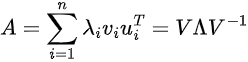

In the above equation, 𝒰ᵢᵀ is the i-th row of the inverse of matrix v. As a result, using the above equation, we can find a matrix whose largest eigenvalue is the second largest eigenvalue of matrix A. In fact, it is sufficient to subtract a rank-one matrix from A. Therefore, by continuing this process, we can obtain the eigenvalues and eigenvectors of A. Based on the points mentioned in the previous section, write a function below that takes a square matrix A and returns a diagonal matrix D and a matrix V of corresponding eigenvectors of D.




In [113]:
# Complete this part!

def eigen(A):
  # input: square matrix A
  # output: diagonal matrix D & eigenvector matrix V
  # NOTE: the equation "A = V @ D @ np.linalg.inv(V)" must hold

  n = len(A)
  eigVal = np.zeros([n,n])
  eigVec = np.zeros([n,n])

  for i in range(n):
      [Lambda , v] = find_largest_eigVal_eigVec(A)
      eigVal[i,i] = Lambda
      eigVec[i,:] = v.T
      A -= Lambda * v.T@v

  return D, V

[D, V] = eigen(A)
print("Eigenvalues = ", (D @ np.ones(len(A)).T) )
print("Eigenvectors = \n", V,"\n")

Eigenvalues =  [ 9.47416379 -7.69451669 -5.15163599]
Eigenvectors = 
 [[-0.41594965 -0.65092859 -0.63504162]
 [-0.2769398   0.75581822 -0.59333226]
 [-0.86619296  0.07092805  0.49465036]] 



## Question 2 (30 points)


As you learned in the course, the least squares method is a way of estimating a function given sample points $$(x_i, y_i), \quad  0 \leq i \leq n$$ with the assumption of linearity of the underlying function.

### step 1
Create n=10 sample points $(x_i, y_i)$ where $$y_i = 2x_i + 3 + \epsilon_i$$ $\epsilon_i$ is an error term (measurement error etc.) added to $y_i$ and is modeled by random variables: $\epsilon_i \stackrel{iid}{\sim} \mathcal{N}(0, 1) $  . The x's should range from 0 to 5 and be evenly spaced (hint: use numpy's linspace function)

In [58]:
n = 10
x = np.linspace(0,5,n)
e = np.random.randn(n)
y = 2 * x + 3 + e

print("x = ", x, "\n")
print("y = ", y)

x =  [0.         0.55555556 1.11111111 1.66666667 2.22222222 2.77777778
 3.33333333 3.88888889 4.44444444 5.        ] 

y =  [ 2.35229882  4.11986348  4.22454468  7.68658061  7.6740491   9.46912111
  7.62617286 10.89442033 11.22499053 12.40726619]


### step 2
Given the samples of the previous part, try to estimate a linear function that models the relationship between $x_i$'s and $y_i$'s using the least squares method (find a and b such that the error function $\sum_{i=0}^{n-1} ||ax_i + b - y_i||^2$ is minimized)

In [59]:
def linear_LS(x, y, n):
    # first we find a matrix A which fits the equation Ax=y which is the matrix format of the LS problem.
    A = np.ones([n,2])
    A[:,1] = x

    x_hat = np.linalg.inv(A.T @ A) @ A.T @ y
    a = x_hat[1]
    b = x_hat[0]

    return [a, b]

[a, b] = linear_LS(x,y,n)
print("a = ", a)
print("b = ", b)

a =  1.9112053383021226
b =  2.9899174261856567


### step 3
Plot the sample points and the line you estimated in the previous part in the same graph using matplotlib.

Text(0, 0.5, 'y')

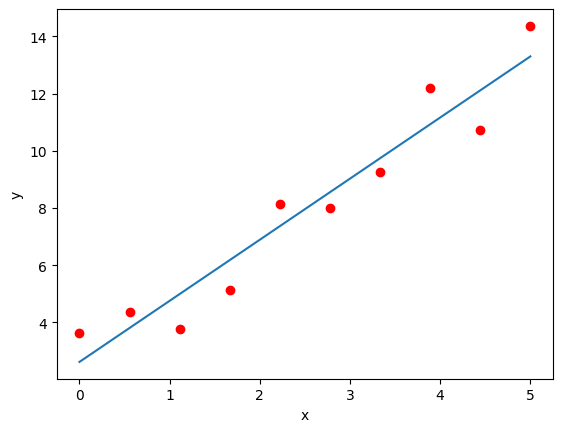

In [44]:
y_hat = a * x + b
plt.scatter(x,y, c='red')
plt.plot(x,y_hat)
plt.xlabel('x')
plt.ylabel('y')

### step 4
Plot the error function $\sum_{i=0}^{n-1} ||ax_i + b - y_i||^2$ as a function of n where $10\leq n \leq 50$ and a and b are the least squares estimates of the line $ax + b = y$.

Text(0, 0.5, 'Error')

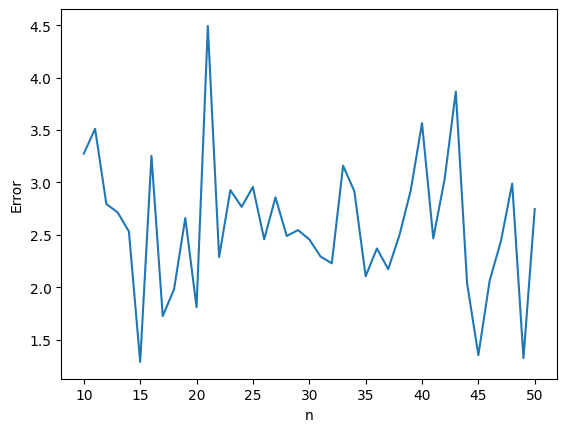

In [73]:
def calc_error(n):
    n = 10
    x = np.linspace(0,5,n)
    e = np.random.randn(n)
    y = 2 * x + 3 + e

    [a, b] = linear_LS(x,y,n)

    error = np.linalg.norm(a*x+b-y)
    return error

n = np.arange(10,51)
errors = np.zeros(len(n))

for i in range(len(n)):
    errors[i] = calc_error(n[i])

plt.plot(n,errors)
plt.xlabel('n')
plt.ylabel('Error')

### step 5
Repeat part 1 but this time create n=20 sample points with a quadratic term added to y: $$y_i = x^2_i + 2x_i + 3 + \epsilon_i$$ $\epsilon_i$ has the same distribution as before and x's range from 0 to 5 likewise.

In [63]:
n2 = 20
x2 = np.linspace(0,5,n2)
e2 = np.random.randn(n2)
y2 = x2**2 + 2*x2 + 3 + e2

print("x = ", x2, "\n")
print("y = ", y2)

x =  [0.         0.26315789 0.52631579 0.78947368 1.05263158 1.31578947
 1.57894737 1.84210526 2.10526316 2.36842105 2.63157895 2.89473684
 3.15789474 3.42105263 3.68421053 3.94736842 4.21052632 4.47368421
 4.73684211 5.        ] 

y =  [ 2.26672448  3.95972174  3.79009396  5.49973927  7.55996442  7.33298622
  7.93171949  9.07027968 11.10039572 13.40678082 13.66830369 15.45301457
 21.48064316 20.08067907 25.98864213 27.25155164 29.03438237 31.74070025
 33.32422305 37.38705011]


### step 6
Try to use the least squares method to estimate the coefficients of the quadratic function given the sample points of part 5 (hint: in the least squares method we minimze the norm of the error vector $||Ax-y||^2$. Add a column to matrix A for the quadratic terms and then try to minimize the error function using the least squares method).

In [64]:
def quad_LS(x, y, n):
    # first we find a matrix A which fits the equation Ax=y which is the matrix format of the LS problem.
    A = np.ones([n,3])
    A[:,0] = x**2
    A[:,1] = x

    x_hat = np.linalg.inv(A.T @ A) @ A.T @ y
    a = x_hat[0]
    b = x_hat[1]
    c = x_hat[2]

    return [a, b, c]

[a2, b2, c2] = quad_LS(x2,y2,n2)
print("y = ax^2 + bx + c")
print("a = ", a2)
print("b = ", b2)
print("c = ", c2)


y = ax^2 + bx + c
a =  0.9664254168650979
b =  2.129628459448798
c =  2.7768281036175653


### step 7
Repeat part 3 for the estimated quadratic function of the previous part.

Text(0, 0.5, 'y')

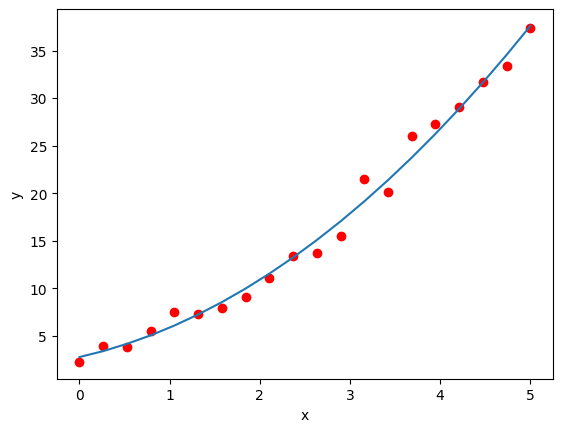

In [65]:
y2_hat = a2*x2**2 + b2*x2 + c2
plt.scatter(x2,y2, c='red')
plt.plot(x2,y2_hat)
plt.xlabel('x')
plt.ylabel('y')

# Question 3 (35 points)

You have been given a dataset containing information about the selling prices and sizes of different houses in a certain area. You have been asked to build a linear regression model using least squares to predict the selling price of a house based on its size.

Tasks:

    Complete the following functions to build a linear regression model using least squares and evaluate its performance on the testing set:

        scatter_plot: Create a scatter plot of the training data with size on the x-axis and selling price on the y-axis.

        compute_slope_intercept: Compute the slope and intercept of the line that best fits the training data using least squares.

        evaluate_performance: Evaluate the performance of the model on the testing set using the mean squared error (MSE) and the coefficient of determination (R^2).

You can use the numpy library to perform the necessary computations.
Pay attention that you should only complete the mentioned functions.

mse : 1386819.5716768785 r squared: 0.9998812710949337


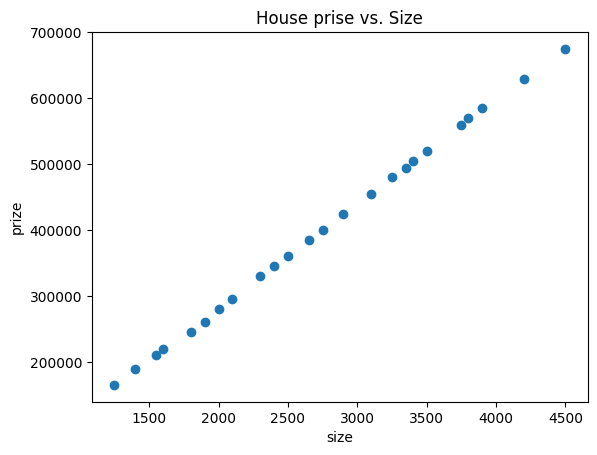

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_csv('house_dataset.csv')

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(df['Size'], df['Price'], test_size=0.2, random_state=42)

def scatter_plot():
    plt.scatter(x_train,y_train)
    plt.xlabel('size')
    plt.ylabel('prize')
    plt.title("House prise vs. Size")

def compute_slope_intercept():
    [slope, intercept] = linear_LS(x_train, y_train, len(x_train))
    return slope, intercept

def evaluate_performance(slope, intercept):
    y_estimate = slope * x_test + intercept
    y_bar = np.average(y_test)

    mse = np.average((y_estimate - y_test)**2)
    r_squared = 1 - np.sum((y_estimate - y_test)**2) / np.sum((y_test - y_bar)**2)

    return mse, r_squared

scatter_plot()
slope , intercept =compute_slope_intercept()
mse , r_squared =evaluate_performance(slope , intercept)
print("mse :" , mse , "r squared:" , r_squared)

 # Question 4 (Bonus part)

You will be given a code that uses the iris dataset and classifies it by Bayesian classifier (you will study classification in a machine learning course).

Tasks:

    You should only complete parts of the code that are asked to be completed.
    Explain what the classifier function does. To do so, you should have a basic knowledge of Bayesian classification.
    Investigate what is the iris dataset and what is the history behind it.

Bayesian classification is a probabilistic classification method that uses Bayes' theorem to calculate the probability of a certain event occurring. In the context of machine learning, it is a common method for classifying data into different categories based on their probability of belonging to a certain class. The classifier function in this code takes a set of features and uses them to classify the input data into different categories based on their probability of belonging to each class
 

In [78]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
import numpy as np

Complete this part:

In [79]:
# Load the iris dataset
iris = load_iris()

# Create a pandas DataFrame from the iris data
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add a column for the target variable
df['target'] = iris.target

# Print the first rows of the DataFrame
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [80]:
# first we devide out datas into training and test ones:
n = 120
x_train = iris.data[:n,:]
x_test = iris.data[n:,:]
y_train = iris.target[:n]
y_test = iris.target[n:]

Complete this part:

In [87]:
# calculation of accuracy:
def accuracy(predicted_outcome):
    error_num = np.count_nonzero(predicted_outcome - y_test)
    acc = (len(predicted_outcome) - error_num) / len(predicted_outcome) * 100
    return acc

In [88]:
# we define a prediction func and then we complete each part:
def predict(Samples):
    predictions = np.zeros(len(Samples))
    for j in range(len(Samples)):
        sample = Samples[j,:]
        probs = np.zeros(3)
        for i in range(3):
            probs[i] = cal_prob(i,sample) * prior_prob[i]
        predictions[j] = np.argmax(probs)
    return predictions

# now we have to define prior probabilities:
prior_prob = np.zeros(3)
for i in range(len(y_test)):
    if y_test[i] == 0:
        prior_prob[0]+=1
    elif y_test[i] == 1:
        prior_prob[1]+=1
    elif y_test[i] == 2:
        prior_prob[2]+=1
for i in range(3):
    prior_prob[i] /= len(y_test)

# calculation of variance and mean of each class:
variances = np.zeros((3,4))
means = np.zeros((3,4))
for i in range(3):
    x_i = x_train[y_train == i ,:]
    means[i,:] = x_i.mean(axis =0)
    variances[i,:] = x_i.var(axis =0)

# calculation of probability:
def cal_prob(i , sample):
    prob = 1;
    for c in range(4):
        exp = -((sample[c] - means[i,c])**2) / (2*variances[i,c])
        prob *= np.exp(exp)*(1/np.sqrt(2*np.pi*variances[i,c]))
    return prob
# Bayesian classifier:
def bay_classifier():
    predicted_outcome = predict(x_test)
    return predicted_outcome

In [89]:
predicted_outcome = bay_classifier()
acc = accuracy(predicted_outcome)
print("Baysian classifier accuracy: ",acc)
y_1 = confusion_matrix(y_test,predicted_outcome)
print("confusion matrix:\n",y_1)

Baysian classifier accuracy:  100.0
confusion matrix:
 [[30]]


## <font color="green"> Here is the report with the explanation of the prior, likelihood and posterior in the Bayesian classifier </font>

A Bayesian classifier is a statistical method that assigns a class label to an observation based on the probability of that observation belonging to that class. It uses Bayes' theorem to calculate the posterior probability of each class given the observation and some prior knowledge about the class distribution. The class with the highest posterior probability is chosen as the predicted label.

Bayes' theorem is a formula that relates the conditional and marginal probabilities of two events. It can be written as:

$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$

In the context of Bayesian classification, the terms in the formula have the following meanings:

- **Posterior**: This is the probability of a class given an observation, denoted by $P(A|B)$. It represents how likely the observation belongs to that class after taking into account the evidence from the observation. The posterior is what we want to estimate and maximize in Bayesian classification.

- **Likelihood**: This is the probability of an observation given a class, denoted by $P(B|A)$. It represents how likely we would observe this feature value if we knew that it belonged to that class. The likelihood is usually derived from the data or a model of the data distribution.

- **Prior**: This is the probability of a class before observing any data, denoted by $P(A)$. It represents our initial belief or assumption about how likely each class is. The prior can be based on some domain knowledge or a uniform distribution.

- **Evidence**: This is the probability of an observation regardless of the class, denoted by $P(B)$. It represents how likely we would observe this feature value in general. The evidence can be calculated by summing over all possible classes, using the law of total probability:

$$P(B) = \sum_{i=1}^n P(B|A_i)P(A_i)$$

There are different types of Bayesian classifiers depending on how they model the probability distributions of the features and the classes. Some common examples are:

- **Naive Bayes classifier**: This classifier assumes that all the features are independent of each other given the class label. It simplifies the calculation of the posterior probability by multiplying the individual probabilities of each feature. It is called naive because it ignores any possible correlations between the features.

- **Bayesian network classifier**: This classifier builds a graphical model that represents the dependencies between the features and the classes using nodes and edges. It allows for more complex and realistic relationships than naive Bayes, but it also requires more data and computational resources to learn and infer.

- **Bayes optimal classifier**: This classifier is a theoretical concept that represents the best possible performance of any Bayesian classifier. It uses the true probability distributions of the features and the classes, which are usually unknown in practice. It minimizes the probability of misclassification or the expected loss.

Bayesian classifiers have many advantages, such as being robust to noise, handling missing data, and incorporating prior knowledge. They are also easy to implement and interpret, and can handle both discrete and continuous features. However, they also have some limitations, such as requiring a large amount of data, making strong assumptions about the data distribution, and being sensitive to irrelevant or redundant features.


# <font color="green">The Iris Dataset in ML</font>

The iris dataset is a multivariate dataset that contains four measurements of floral morphology (sepal length, sepal width, petal length, and petal width) for 150 plants belonging to three species of iris flowers (Iris setosa, Iris versicolor, and Iris virginica). The dataset is widely used as an example of statistical classification and machine learning techniques.



![Iris setosa](https://th.bing.com/th/id/OIP.nfK3vGZkTa4GrO7yWpcS-QHaDT?pid=ImgDet&rs=1)

![Iris setosa](https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Iris_dataset_scatterplot.svg/480px-Iris_dataset_scatterplot.svg.png)

## <font color="green">What is the history behind the iris dataset?</font>

The iris dataset was introduced by the British statistician and biologist Ronald Fisher in his 1936 paper "The use of multiple measurements in taxonomic problems" as an example of linear discriminant analysis. Fisher proposed a method to predict the species of iris flowers based on the combination of the four measurement variables. He used the data collected by the American botanist Edgar Anderson near Gaspé, Quebec, Canada in the 1930s.

The iris dataset is also known as Fisher's iris dataset or Anderson's iris dataset. It has become a classic and popular dataset for testing and demonstrating various statistical and machine learning methods. It is also one of the first datasets to be published online and has its own Wikipedia page.

## <font color="green">Why is the iris dataset useful and common for ML applications?</font>

The iris dataset has been used extensively in machine learning applications, particularly in classification problems. In a typical classification task, the goal is to build a model that can predict the class label (iris species) of an unseen data point, based on its measurements (sepal and petal dimensions). The iris dataset is suitable for this task because:

- It has a clear and simple structure, with three well-defined and balanced classes, and four numeric and continuous features.
- It is small enough to be easily loaded and manipulated, but large enough to demonstrate the effectiveness of various machine learning methods.
- It is also useful for demonstrating other aspects of machine learning, such as data preprocessing, feature engineering, model evaluation, cross-validation, hyperparameter tuning, and model selection.

## <font color="green">What are some examples of machine learning techniques that have been applied to the iris dataset?</font>

Some examples of machine learning techniques that have been applied to the iris dataset are:

- **Linear discriminant analysis**: This was the original method proposed by Fisher in his 1936 paper. It uses a linear function to separate the classes based on the combination of the features.
- **Support vector machines**: This is a popular method that uses a nonlinear function to map the features into a higher-dimensional space, where a linear hyperplane can separate the classes with maximum margin.
- **K-means clustering**: This is an unsupervised method that partitions the data into k groups based on the similarity of the features. It can be used to discover the natural clusters in the data without using the class labels.
- **Naive Bayes classifier**: This is a simple method that assumes that all the features are independent given the class label. It calculates the posterior probability of each class based on the product of the individual probabilities of each feature.
- **Decision trees**: This is a method that builds a tree-like structure to represent the rules for classifying the data. It splits the data recursively based on the best feature that maximizes the information gain.
- **Neural networks**: This is a method that mimics the structure and function of biological neurons. It consists of layers of interconnected nodes that process and transmit information. It can learn complex and nonlinear patterns from the data.

The iris dataset is a classic and popular dataset for testing and demonstrating various statistical and machine learning methods. It is also one of the first datasets to be published online and has its own Wikipedia page. The iris dataset is praised for its simplicity, clarity, and elegance, but it also has some limitations and criticisms, such as being too easy, too small, and too homogeneous.
